In [1728]:
# by Joh Schöneberg 2018

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

pathOfTheYeastTrackAnalysisFolder = '/Users/Yidi/Desktop/YeastTrackAnalysis-master/'

import sys
pythonPackagePath = pathOfTheYeastTrackAnalysisFolder+"/src/"
sys.path.append(pythonPackagePath)
import YeastTrackFunctions as ytf

# read data

In [1733]:
#path = "/Volumes/Yidi's Niko/data/Two color movies/06082018 data /Ysy4257/2/B 137msec/report 1 green/"
path = "/Users/Yidi/Desktop/YeastTrackAnalysis-master/"
folder = 'dataToAnalyze/'

################
# THESE ARE THE ONLY PARAMETERS TO CHANGE

# change your filename to the file you want to analyze
file = '69.csv'

# 
frameToSecondConversion = 0.137
pixelToNanometerConversion = 65

# if your file is a CSV: put FALSE
# if your file is a EXCEL: put TRUE
isExcel = False


################


outputpath = path+folder

In [1734]:
if (isExcel):
    data = pd.read_excel(path+folder+file)
else:
    data = pd.read_csv(path+folder+file)
dataIndex = np.invert(np.isnan(data['x']))
data = data[dataIndex]
data[0:5]

,,Trajectory,Frame,x,y,z,m0,m1,m2,m3,m4,NPscore,Unnamed: 12,1.73032,1.73032.1,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,1.0,353.0,5.0,131.66891,681.94012,0.0,0.52031,2.15673,5.93535,18.83017,66.10519,0.01736,NaN,NaN,NaN,NaN,0.5,0.300702,0.473900
1,2.0,353.0,6.0,131.78397,682.39984,0.0,0.55810,1.97134,5.04494,15.25252,52.49259,0.00918,NaN,NaN,NaN,NaN,1.0,0.322541,0.146602
2,3.0,353.0,7.0,131.75171,682.06110,0.0,0.60602,2.08113,5.49186,16.72410,56.72731,0.02219,NaN,NaN,NaN,NaN,1.5,0.350236,0.188911
3,4.0,353.0,8.0,131.72189,681.75879,0.0,0.63122,2.15161,5.86719,18.46878,64.63937,0.02175,NaN,NaN,NaN,NaN,2.0,0.364800,0.408293
4,5.0,353.0,9.0,132.06914,681.85938,0.0,0.63579,1.93291,4.71159,13.15355,40.74243,0.01030,NaN,NaN,NaN,NaN,2.5,0.367441,0.319072


# Trajectory in x,y

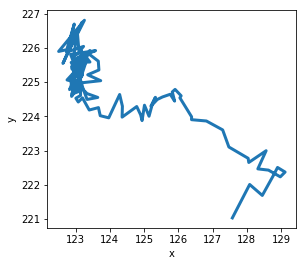

In [1714]:

x = data['x']
y = data['y']
plt.plot(x,y,lw=3)
plt.xlabel('x')
plt.ylabel('y')
plt.gca().set_aspect('equal', adjustable='box')
plt.savefig(outputpath+file+'_traj_xy.png')

# distance from start

In [1715]:
time = frameToSecondConversion*data['Frame']
distancesFromStart = []
for i in range(1,len(data)):
    v0 = np.array([x[0],y[0]])
    v1 = np.array([x[i],y[i]])
    dist = np.linalg.norm(v0-v1)
    distancesFromStart.append(dist)
distancesFromStart = pixelToNanometerConversion* np.array(distancesFromStart)



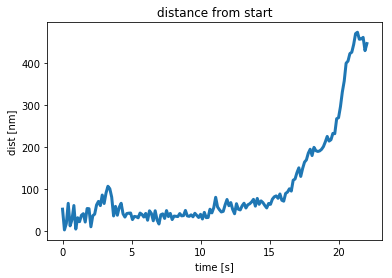

In [1716]:
plt.plot(time[0:-1],distancesFromStart,lw=3)
plt.title('distance from start')
plt.xlabel('time [s]')
plt.ylabel('dist [nm]')
plt.savefig(outputpath+file+'_distToStart.png')

# intensity

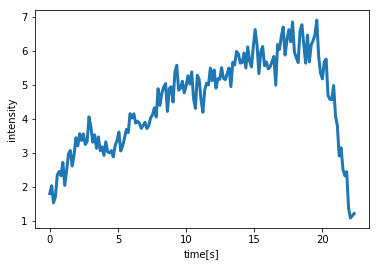

In [1717]:

intensity = data['m0']
plt.plot(time,intensity,lw=3)
plt.xlabel('time[s]')
plt.ylabel('intensity')
plt.savefig(file+'_intensity.png')

# speed

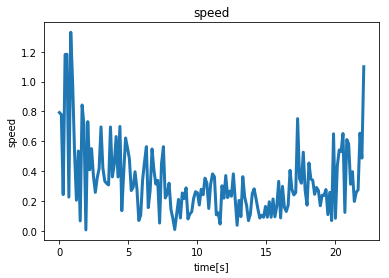

In [1718]:
x = data['x']
y = data['y']
frameByFrameDistances = []
for i in range(1,len(data)):
    v0 = np.array([x[i-1],y[i-1]])
    v1 = np.array([x[i],y[i]])
    dist = np.linalg.norm(v0-v1)
    frameByFrameDistances.append(dist)
frameByFrameDistances = np.array(frameByFrameDistances)


plt.plot(time[0:-1],frameByFrameDistances,lw=3)
plt.title('speed')
plt.xlabel('time[s]')
plt.ylabel('speed')
plt.savefig(outputpath+file+'_speed.png')

# find inflection point

inflectionPointIndex: 117
inflectionPoint Frame: 117
inflectionPoint Intensity: 5.47356


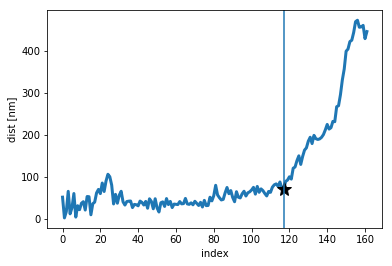

In [1719]:


x=np.arange(0,len(distancesFromStart))
y=distancesFromStart

inflectionPointIndex = ytf.findInflectionPoint(x,y)
print("inflectionPointIndex: {}".format(inflectionPointIndex))
print("inflectionPoint Frame: {}".format(data['Frame'][inflectionPointIndex]))
print("inflectionPoint Intensity: {}".format(data['m0'][inflectionPointIndex]))


#plt.plot(x, newy, 'o', label='original data',color='b')
plt.plot(distancesFromStart,lw=3)
plt.plot(x[inflectionPointIndex],y[inflectionPointIndex], 'k*',markersize=15)
plt.axvline(x[inflectionPointIndex])

plt.xlabel('index')
plt.ylabel('dist [nm]')
plt.savefig(outputpath+file+'_inflectionPoint.png')

# plot distance and intensity at the same time

inflectionPoint Frame: 117
inflectionPoint Time[s]: 16.029
inflectionPoint Intensity: 5.47356


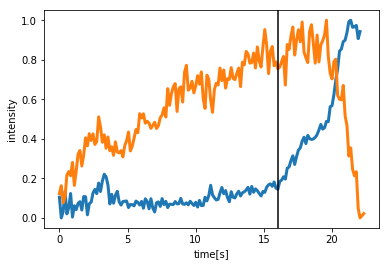

In [1720]:
plt.plot(time[0:-1],(distancesFromStart-np.min(distancesFromStart))/np.max(distancesFromStart-np.min(distancesFromStart)),lw=3)
#plt.title('distance from start')
plt.xlabel('time [s]')
plt.ylabel('dist [nm]')
#plt.savefig(file+'_distToStart.png')


plt.plot(time,(intensity-np.min(intensity))/np.max(intensity-np.min(intensity)),lw=3)
plt.xlabel('time[s]')
plt.ylabel('intensity')

plt.axvline(time[0:-1][inflectionPointIndex],c='k')
print("inflectionPoint Frame: {}".format(data['Frame'][inflectionPointIndex]))
print("inflectionPoint Time[s]: {}".format(frameToSecondConversion*(data['Frame'][inflectionPointIndex])))
print("inflectionPoint Intensity: {}".format(data['m0'][inflectionPointIndex]))

plt.savefig(outputpath+file+'_intensity+distance.png')

# statistics

In [1721]:
print("max intensity: {}".format(np.max(data['m0'])))
print("first frame: {}".format(data['Frame'][0]))
print("last frame: {}".format(np.array(data['Frame'])[-1]))

lenthOfTrackInFrames = np.array(data['Frame'])[-1]-np.array(data['Frame'][0])
print("lenght of track [frames]: {}".format(lenthOfTrackInFrames))

print("lenght of track [s]: {}".format(frameToSecondConversion*lenthOfTrackInFrames))

max intensity: 6.90341
first frame: 0
last frame: 163
lenght of track [frames]: 163
lenght of track [s]: 22.331


## 